[比赛地址](https://tianchi.aliyun.com/competition/information.htm?spm=5176.100067.5678.2.7890a1dcnyVaYL&raceId=231620)

In [30]:
############# 1.数据预处理 ################
import numpy as np
import tensorflow as tf
import pandas as pd
from pandas import Series,DataFrame

train_shop = pd.read_csv(r"F:/data/shop/训练数据-ccf_first_round_shop_info.csv")
train_user = pd.read_csv(r"F:/data/shop/训练数据-ccf_first_round_user_shop_behavior.csv")
test = pd.read_csv(r"F:/data/shop/AB榜测试集-evaluation_public.csv")

## PART 1 观察数据
### 1.训练数据-ccf_first_round_shop_info.csv

In [3]:
train_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8477 entries, 0 to 8476
Data columns (total 6 columns):
shop_id        8477 non-null object
category_id    8477 non-null object
longitude      8477 non-null float64
latitude       8477 non-null float64
price          8477 non-null int64
mall_id        8477 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 397.4+ KB


In [3]:
train_shop.describe()
#消费最高88最低24 说明都是消费了的人群

,longitude,latitude,price
count,8477.000000,8477.000000,8477.000000
mean,117.426526,32.961908,50.527309
std,4.367982,4.687368,9.416713
min,104.414352,23.157355,24.000000
25%,114.829869,30.911022,43.000000
50%,118.192157,32.181703,50.000000
75%,120.927247,36.827750,59.000000
max,123.801593,42.367802,88.000000


In [22]:
shop_id  = train_shop['shop_id'].drop_duplicates()
print('shop_id : ', shop_id .count()) 
#一共8477条数据，而shop_id = 8477，说明每个shop一条...

category_id = train_shop['category_id'].drop_duplicates()
print('category_id: ', category_id.count()) 
#店铺类型ID

mall_id = train_shop['mall_id'].drop_duplicates()
print('mall_id: ', mall_id.count())
#97个商城

lo_id = train_shop['longitude'].drop_duplicates()
print('lo_id: ', lo_id.count())
#经纬度有重合，说明不同楼层统一位置

shop_id :  8477
category_id:  67
mall_id:  97
lo_id:  6991


In [17]:
train_shop.head()

,shop_id,category_id,longitude,latitude,price,mall_id
0,s_26,c_4,122.346736,31.833507,57,m_690
1,s_133,c_6,121.134362,31.197511,58,m_6587
2,s_251,c_38,121.000505,30.907667,34,m_5892
3,s_372,c_30,119.864982,26.659876,44,m_625
4,s_456,c_26,122.594243,31.581499,44,m_3839


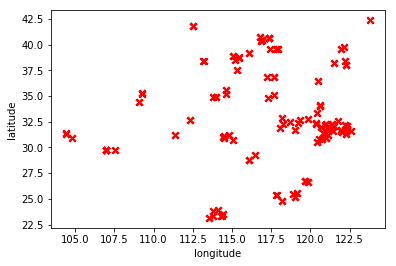

In [26]:
#观察下大致的经纬度关系
import matplotlib.pyplot as plt
def plotLOLA(lo,la):
    fig = plt.figure()  
    ax= fig.add_subplot(111) #使画在一个图上
    
    ax = plt.scatter(lo, la, marker = 'x', color = 'r')  

    plt.xlabel('longitude') 
    plt.ylabel('latitude')
    
    plt.show()

plotLOLA(train_shop['longitude'],train_shop['latitude'])

### 2.训练数据-ccf_first_round_user_shop_behavior.csv

In [9]:
train_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138015 entries, 0 to 1138014
Data columns (total 6 columns):
user_id       1138015 non-null object
shop_id       1138015 non-null object
time_stamp    1138015 non-null object
longitude     1138015 non-null float64
latitude      1138015 non-null float64
wifi_infos    1138015 non-null object
dtypes: float64(2), object(4)
memory usage: 52.1+ MB


In [10]:
train_user.describe()

,longitude,latitude
count,1.138015e+06,1.138015e+06
mean,1.174162e+02,3.286613e+01
std,4.359182e+00,4.392070e+00
min,-1.139504e+02,5.364270e-01
25%,1.146429e+02,3.097768e+01
50%,1.180478e+02,3.208677e+01
75%,1.210030e+02,3.525854e+01
max,1.271192e+02,5.110064e+01


In [11]:
user_id  = train_user['user_id'].drop_duplicates()
print('user_id : ', user_id .count())
#一共1138015条数据，说明同一用户有多条信息

shop_id  = train_user['shop_id'].drop_duplicates()
print('shop_id : ', shop_id .count())


user_id :  714608
shop_id :  8477


In [18]:
train_user.head()

,user_id,shop_id,time_stamp,longitude,latitude,wifi_infos
0,u_376,s_2871718,2017-08-06 21:20,122.308291,32.088040,b_6396480|-67|false;b_41124514|-86|false;b_287...
1,u_376,s_2871718,2017-08-06 21:20,122.308162,32.087970,b_6396480|-67|false;b_56328155|-73|false;b_411...
2,u_1041,s_181637,2017-08-02 13:10,117.365255,40.638214,b_8006367|-78|false;b_2485110|-52|false;b_3005...
3,u_1158,s_609470,2017-08-13 12:30,121.134451,31.197416,b_26250579|-73|false;b_26250580|-64|false;b_26...
4,u_1654,s_3816766,2017-08-25 19:50,122.255867,31.351320,b_39004150|-66|false;b_39004148|-58|false;b_21...


In [23]:
true_count = 0
for i in train_user['wifi_infos']:
    if 'true' in i:
        true_count+=1
print(true_count)
#一共1138015条信息，714608个用户，231976条连接了wifi。

231976


### 3.AB榜测试集-evaluation_public.csv

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483931 entries, 0 to 483930
Data columns (total 7 columns):
row_id        483931 non-null int64
user_id       483931 non-null object
mall_id       483931 non-null object
time_stamp    483931 non-null object
longitude     483931 non-null float64
latitude      483931 non-null float64
wifi_infos    483931 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 25.8+ MB


In [34]:
user_id  = test['user_id'].drop_duplicates()
print('user_id : ', user_id .count())
#一共1138015条数据，说明同一用户有多条信息

mall_id  = test['mall_id'].drop_duplicates()
print('mall_id : ', mall_id.count())


user_id :  338642
mall_id :  97


In [21]:
test.head()

,row_id,user_id,mall_id,time_stamp,longitude,latitude,wifi_infos
0,118742,u_30097142,m_3916,2017-09-05 13:00,122.141011,39.818847,b_34366982|-82|false;b_37756289|-53|false;b_41...
1,118743,u_30097803,m_5085,2017-09-06 13:10,118.191907,32.855858,b_36722251|-81|false;b_10537579|-75|false;b_43...
2,118744,u_30097889,m_4033,2017-09-06 17:40,119.192110,32.424667,b_30026291|-74|false;b_30026290|-74|false;b_36...
3,118745,u_30098996,m_4515,2017-09-03 12:10,120.612201,34.055249,b_33412374|-77|false;b_22084893|-86|false;b_52...
4,118746,u_30099170,m_7168,2017-09-02 20:40,116.861989,40.326858,b_19882704|-77|false;b_2241462|-49|false;b_585...


In [31]:
print(type(train_shop))
print(type(test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


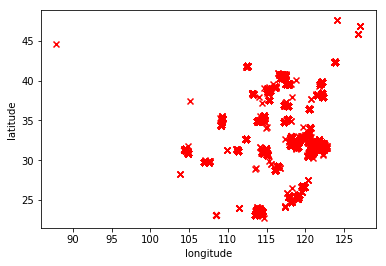

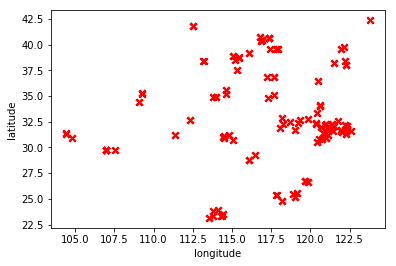

In [33]:
plotLOLA(test['longitude'],test['latitude'])
plotLOLA(train_shop['longitude'],train_shop['latitude'])

## PART 2 初步处理
### 1.处理train_user中的wifi信息
因为三个点距可以确定坐标系中一个点，暂时考虑取前三个最强的wifi

In [8]:
test_wifi = train_user['wifi_infos'][0]
print(test_wifi)

b_6396480|-67|false;b_41124514|-86|false;b_28723327|-90|false;b_6396479|-55|false;b_8764723|-90|false;b_32053319|-74|false;b_5857370|-68|false;b_56326644|-89|false;b_56328155|-77|false;b_5857369|-55|false


In [15]:
def wifiTop3(wifi_infos):
    #wifi_infos:str
    #output:top 3 wifi / [[1],[2],[3]]
    row_list = wifi_infos.split(';')
    print(row_list)
    def sortWifi(wifiStr):
        wifi_num = int(wifiStr.split('|')[1])
        return wifi_num
    sort_list = sorted(row_list, key=sortWifi)
    print(sort_list)
    return sort_list[-3:]

print(wifiTop3(test_wifi)[::-1])

['b_6396480|-67|false', 'b_41124514|-86|false', 'b_28723327|-90|false', 'b_6396479|-55|false', 'b_8764723|-90|false', 'b_32053319|-74|false', 'b_5857370|-68|false', 'b_56326644|-89|false', 'b_56328155|-77|false', 'b_5857369|-55|false']
['b_28723327|-90|false', 'b_8764723|-90|false', 'b_56326644|-89|false', 'b_41124514|-86|false', 'b_56328155|-77|false', 'b_32053319|-74|false', 'b_5857370|-68|false', 'b_6396480|-67|false', 'b_6396479|-55|false', 'b_5857369|-55|false']
['b_5857369|-55|false', 'b_6396479|-55|false', 'b_6396480|-67|false']


后续同样可以处理test中的wifi信息

### 2.思考wifi的作用
* 考虑一个用户会自动连接同一个wifi，所以出现相同用户连接同一个wifi概率极高（但是好像test中的用户ID不一样...）
* 若为true，考虑信号强度 / 主动问密码等原因，对于商店，用户只有在支付时可能连接wifi；
   而对于饮食店，可能会一直连接，那么在食品店旁边的商店支付时也不会断开；
* 大多数都是没有连接wifi的，最基本的，通过前三强度的wifi定位当前位置，最好是在训练时就得到每一家店的wifi信息。但是有个问题，这是在商城，存在不同楼层同一经纬度的情况。
* 正常来讲，强度最大的就是本店的wifi，但也要考虑几个特殊情况:
   1.本店没有wifi（应该很少）；
   2.本店wifi网不好，这样也应该能排在前三；
   3.其他（再补充）